<a href="https://www.kaggle.com/code/ahmadibraheeem/digit-recognition-keras-vs-pytorch-strat-test?scriptVersionId=149465911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit Recognition with Keras and PyTorch

This notebook demonstrates the process of building and comparing digit recognition models using two popular deep learning frameworks: Keras and PyTorch. The goal is to showcase the strengths and differences between these frameworks in the context of a classic machine learning problem: recognizing handwritten digits from the MNIST dataset.


# Model 1
# Using Keras

### Preliminary Set-Up
### Import the necessary libraries for deep learning and data handling.

In [1]:

# General imports
import numpy as np
import matplotlib.pyplot as plt

# Keras-related imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback, Callback

# PyTorch-related imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
import torch.nn.functional as F
from torchvision import datasets, transforms

# Scikit-learn imports for both Keras and PyTorch
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preparation: Splitting the Dataset

We will use the `train_test_split` method to divide our dataset into training and testing sets. This is a crucial step in machine learning to ensure that we have a separate dataset to evaluate the performance of our model after training.


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Convert class vectors to binary class matrices (One-hot encoding).
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Stratify the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


# CNN Architecture Definition
This cell outlines the creation of the CNN model through the following steps:

Initialize a sequential model to allow for the easy stacking of layers.
Add a convolutional layer (Conv2D) with 32 filters, a kernel size of 5x5, and ReLU activation function, configured to accept the input shape of the MNIST images.
Introduce a max pooling layer (MaxPooling2D) to reduce the spatial dimensions of the output volume.
Implement dropout (Dropout) with a rate of 0.2 to prevent overfitting by randomly ignoring some neurons during training.
Flatten the 3D output to 1D using the Flatten layer, making it possible to connect to dense layers.
Add a fully connected layer (Dense) with 128 neurons and ReLU activation to learn non-linear combinations of features.
Add the output layer with a number of neurons corresponding to the number of classes (digits 0-9) with softmax activation for multi-class classification.
Compile the model using categorical crossentropy as the loss function, RMSprop as the optimizer, and track accuracy as a metric.
The function create_model() encapsulates the model construction and is called to initialize the model.

In [3]:
# Define the CNN architecture

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model using categorical crossentropy as the loss function and RMSprop as the optimizer.
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
    return model

# Initialize the model
model = create_model()

# Model Training and Evaluation

This cell includes several components related to training the CNN and evaluating its performance:

Custom Callback Definition: A custom callback class AccuracyHistory is defined using Keras' Callback class. This callback is designed to store the accuracy and loss after each epoch during training, which can be useful for later analysis.

Model Training: The CNN model is trained using the model.fit function. The training data and validation data are passed, along with the number of epochs and batch size. The custom callback Keras_non_strat is included to track accuracy and loss per epoch.

Final Model Evaluation: After training, the model's performance is evaluated on the test dataset using the model.evaluate function. The baseline error percentage is printed, which is the percentage of misclassified test samples.

Prediction and F1 Score Calculation: The model makes predictions on the validation set. The predicted classes are converted from one-hot encoded vectors to class labels using argmax. The true class labels are similarly extracted from the validation labels. The F1 score, a harmonic mean of precision and recall, is calculated using the true and predicted class labels and printed as a percentage.

In [4]:
# Define a callback to print accuracy after each epoch
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('accuracy'))
        self.loss.append(logs.get('loss'))
Keras_non_strat = AccuracyHistory()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2, callbacks=[Keras_non_strat])
#print_callbacks = [0][print_callback]

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val, axis = 1) 

# compute the confusion matrix
f1 = f1_score(Y_true, Y_pred_classes, average='macro')
print("F1 Score: %.2f%%" % (f1*100))

Epoch 1/10


2023-11-05 22:39:06.300787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


240/240 - 13s - loss: 0.2805 - accuracy: 0.9151 - val_loss: 0.1110 - val_accuracy: 0.9660 - 13s/epoch - 55ms/step
Epoch 2/10
240/240 - 1s - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0654 - val_accuracy: 0.9803 - 877ms/epoch - 4ms/step
Epoch 3/10
240/240 - 1s - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0513 - val_accuracy: 0.9845 - 885ms/epoch - 4ms/step
Epoch 4/10
240/240 - 1s - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0527 - val_accuracy: 0.9840 - 887ms/epoch - 4ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0446 - val_accuracy: 0.9865 - 885ms/epoch - 4ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0414 - val_accuracy: 0.9875 - 879ms/epoch - 4ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0428 - val_accuracy: 0.9873 - 885ms/epoch - 4ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0505 - val_accuracy: 0.9846 - 878ms/epoch - 4ms/step
Epoch 9/10


# Model 2
# Stratified Sampling with Keras
This section introduces the concept of stratified sampling for splitting the dataset:

## Stratified Sampling:
To ensure that each split of the data contains approximately the same percentage of samples of each target class as the complete set, StratifiedShuffleSplit is utilized. Stratified sampling is crucial in classification tasks where the target classes are imbalanced, as it helps in maintaining the class distribution in training, validation, and test sets.

#### Objective:
The objective of this section is to demonstrate the use of StratifiedShuffleSplit from the sklearn.model_selection module to create a stratified split of the MNIST dataset. This will be compared with the previous train_test_split method to evaluate the impact of stratification on the model's performance.

# Data Loading and Stratified Splitting
This cell performs the following operations:

Data Loading: The MNIST dataset is loaded using Keras's built-in mnist.load_data() function, which returns the training and testing sets.

Data Reshaping: The images are reshaped to fit the input shape required by the CNN, which in this case is [samples][width][height][channels].

Normalization: The pixel values are normalized to fall within the range of 0 to 1. This helps with the training process by keeping the input values small.

One-Hot Encoding: The labels for the training and testing sets are one-hot encoded, converting them from a single integer to a vector of zeros with a single one at the index of the class value.

Stratified Splitting: The StratifiedShuffleSplit function from sklearn is used to create a stratified split of the training data into new training and validation sets. This ensures that each class is equally represented across both sets, which is important for maintaining the balance of class representation, especially in datasets with an uneven distribution of classes.

In [5]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Stratify the training data into training and validation sets
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, val_index in sss.split(X_train, np.argmax(y_train, axis=1)):
    X_train_new, X_val = X_train[train_index], X_train[val_index]
    y_train_new, y_val = y_train[train_index], y_train[val_index]
    break

# CNN Model Re-definition and Stratified Training
The cell repeats several steps from the non-stratified approach but applies them to the stratified data:

Model Re-definition: The CNN model is defined again with the same architecture as before. It is not clear why the model is being re-defined; it might be due to wanting to start fresh with new weights.

Custom Callback: The AccuracyHistory class is defined again (which might be redundant if defined before in the same notebook) to track the accuracy and loss after each epoch during training.

Model Training: The model is trained using the stratified training and validation sets, with the same number of epochs and batch size as the non-stratified approach. The keras_strat custom callback is used to track performance metrics.

Model Evaluation: The trained model's performance is evaluated on the test set, and the baseline error is printed as a percentage.

Prediction and Performance Metrics: Predictions are made on the validation set, and the F1 score is calculated and printed. The process for predictions and calculations is the same as in the non-stratified approach.

In [6]:
# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
    return model

# Build the model
model = create_model()

# Define a callback to print accuracy after each epoch

class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('accuracy'))
        self.loss.append(logs.get('loss'))
keras_strat = AccuracyHistory()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2, callbacks=[keras_strat])

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val, axis = 1) 
# compute the confusion matrix
f1 = f1_score(Y_true, Y_pred_classes, average='macro')
print("F1 Score: %.2f%%" % (f1*100))

Epoch 1/10


2023-11-05 22:39:50.656694: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


300/300 - 2s - loss: 0.2405 - accuracy: 0.9270 - val_loss: 0.0691 - val_accuracy: 0.9802 - 2s/epoch - 6ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0402 - val_accuracy: 0.9872 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0309 - val_accuracy: 0.9901 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0195 - val_accuracy: 0.9949 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0186 - val_accuracy: 0.9945 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0125 - val_accuracy: 0.9959 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0081 - val_accuracy: 0.9974 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0149 - val_accuracy: 0.9948 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s - loss: 0.0

# Model 3
# Using PyTorch 
This part of the notebook transitions from Keras to PyTorch, a different deep learning framework. It will cover:

PyTorch Model: An introduction to constructing and training a neural network using PyTorch. PyTorch offers dynamic computation graphs as opposed to Keras's static graphs, which can provide more flexibility in model design and debugging.

Random Data Split: Before diving into the PyTorch model, the notebook seems to be preparing to address data splitting again, but this time using a random split approach within the PyTorch framework. This could serve as a baseline comparison to understand the impact of data split strategies on model performance in PyTorch, just as it was examined in Keras.

# PyTorch CNN Model Definition

In PyTorch, we define a neural network by creating a class that inherits from nn.Module. The CNN architecture is defined in this class as follows:

The class Net is defined, which will serve as our CNN model.

The __init__ method initializes the layers of the network:

conv1: The first convolutional layer with 1 input channel (grayscale image), 32 output channels (filters), and a kernel size of 5.

pool: A max pooling layer with a window size of 2x2 and stride of 2 to reduce spatial dimensions.

fc1: The first fully connected (dense) layer that takes the flattened output of the last pooling layer and has 128 output features.

fc2: The second fully connected layer that produces 10 output features, corresponding to the 10 classes of the MNIST digits.

The forward method defines the forward pass of the network:

The input x is passed through the convolutional layer, followed by ReLU activation and max pooling.

The pooled feature map is flattened to a vector before being passed to the fully connected layers.

A ReLU activation is applied after the first fully connected layer.
The output of the second fully connected layer (fc2) is returned without an activation function, as this will be included in the loss function during training.

By defining the Net class, we have constructed the blueprint for our PyTorch CNN model. The actual instantiation and usage of this model will follow in subsequent code cells.

In [7]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Data Preparation for PyTorch Model
This cell includes steps for loading and preparing the MNIST dataset for use in the PyTorch framework:

#### Data Transformation: 
A transformation pipeline is defined using transforms.Compose to convert image data to PyTorch tensors and normalize the pixel values.

#### Dataset Loading: 
The MNIST dataset is loaded for both training and testing using datasets.MNIST. The train parameter is set appropriately, and the transformation pipeline is applied.

#### Stratified Splitting: 
Unlike the stratified approach used with Keras, this cell uses random_split to divide the training data into training and validation sets. This split is not stratified, which might be an oversight given the section title or an intentional decision for comparison purposes.

#### DataLoaders: 
DataLoader objects are created for the training, validation, and test sets. These objects provide an iterable over the given dataset and can shuffle the data and organize it into batches.

In [8]:
# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Stratify the training data into training and validation sets
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(trainset, batch_size=200, shuffle=True)
valloader = DataLoader(valset, batch_size=200, shuffle=True)
testloader = DataLoader(testset, batch_size=200, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 94589787.08it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42236992.27it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27599094.10it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7127021.61it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
# Initialize the model, loss function and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
PyTorch_No_Strat_acc=[]
PyTorch_No_Strat_loss=[]
# Train the model
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    PyTorch_No_Strat_acc.append(100 * correct / total)
    PyTorch_No_Strat_loss.append(running_loss / len(trainloader))
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(trainloader)}, Accuracy = {100 * correct / total}")

Epoch 1: Loss = 0.30169860705112417, Accuracy = 92.5375
Epoch 2: Loss = 0.07062862432018543, Accuracy = 97.76875
Epoch 3: Loss = 0.047612599871354175, Accuracy = 98.50208333333333
Epoch 4: Loss = 0.036626526286515096, Accuracy = 98.83333333333333
Epoch 5: Loss = 0.028289867178925003, Accuracy = 99.12291666666667
Epoch 6: Loss = 0.023326766438549383, Accuracy = 99.22708333333334
Epoch 7: Loss = 0.016849034781140897, Accuracy = 99.45833333333333
Epoch 8: Loss = 0.014189044175145682, Accuracy = 99.55
Epoch 9: Loss = 0.012018609754886712, Accuracy = 99.60833333333333
Epoch 10: Loss = 0.009009535155564663, Accuracy = 99.70833333333333


In [10]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Calculate F1 score
y_true = []
y_pred = []
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score: %.2f%%" % (f1*100))

Accuracy of the network on the test images: 98 %
F1 Score: 98.51%


# Model 4
# Stratified PyTorch Model
Using **StratifiedShuffleSplit** to stratify the Data with equal representation of features between Train, Validata and Test Data

In [11]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Stratify the training data into training and validation sets
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
targets = trainset.targets.numpy()
for train_index, val_index in sss.split(targets, targets):
    trainset_new = Subset(trainset, train_index)
    valset = Subset(trainset, val_index)
    break

trainloader = DataLoader(trainset_new, batch_size=200, shuffle=True)
valloader = DataLoader(valset, batch_size=200, shuffle=True)
testloader = DataLoader(testset, batch_size=200, shuffle=False)

In [13]:
# Initialize the model, loss function and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
PyTorch_Strat_acc=[]
PyTorch_Strat_loss=[]
# Train the model
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    PyTorch_Strat_acc.append(100 * correct / total)
    PyTorch_Strat_loss.append(running_loss / len(trainloader))
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(trainloader)}, Accuracy = {100 * correct / total}")

Epoch 1: Loss = 0.39880199832841756, Accuracy = 91.31666666666666
Epoch 2: Loss = 0.08520586701730887, Accuracy = 97.47916666666667
Epoch 3: Loss = 0.05903650774077202, Accuracy = 98.175
Epoch 4: Loss = 0.04501031609252095, Accuracy = 98.58541666666666
Epoch 5: Loss = 0.03513227397537169, Accuracy = 98.91458333333334
Epoch 6: Loss = 0.02560614448642203, Accuracy = 99.20625
Epoch 7: Loss = 0.020271148461809694, Accuracy = 99.39375
Epoch 8: Loss = 0.01546320185540632, Accuracy = 99.525
Epoch 9: Loss = 0.013077444400793562, Accuracy = 99.55
Epoch 10: Loss = 0.009485468525235774, Accuracy = 99.70833333333333


In [14]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Calculate F1 score
y_true = []
y_pred = []
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score: %.2f%%" % (f1*100))

Accuracy of the network on the test images: 98 %
F1 Score: 98.40%


# Comparing Models

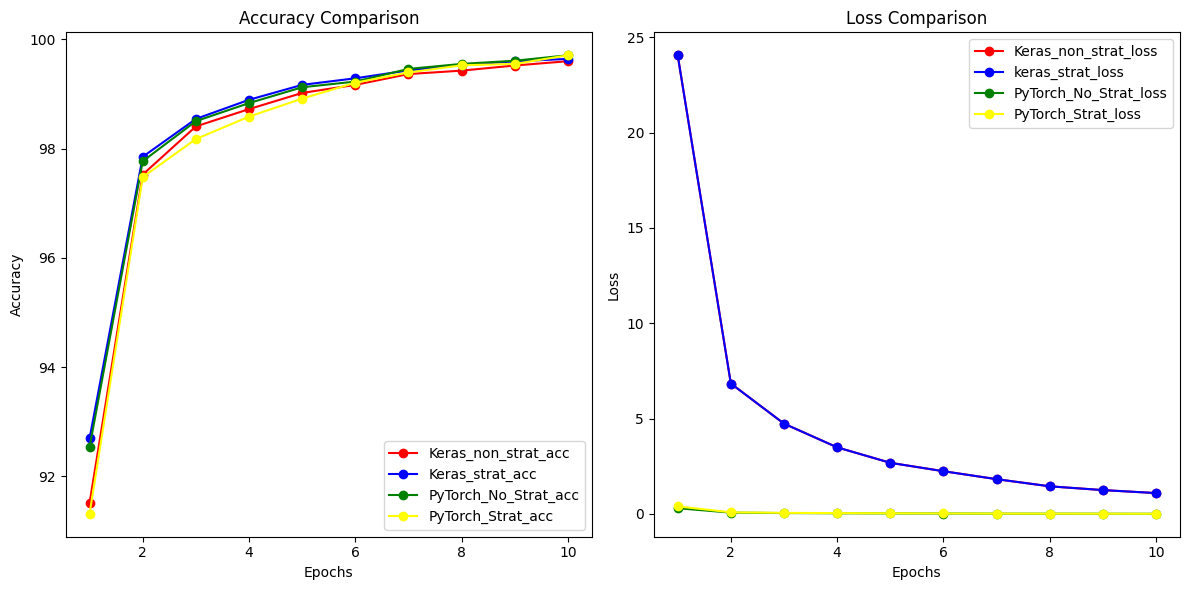

In [15]:
# Create x axis data
x = list(range(1, len(PyTorch_No_Strat_acc)+1))
Keras_strat_acc = [x * 100 for x in keras_strat.acc]
Keras_non_strat_acc = [x * 100 for x in Keras_non_strat.acc]
keras_strat_loss = [x * 100 for x in keras_strat.loss]
Keras_non_strat_loss = [x * 100 for x in keras_strat.loss]
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracies on the first subplot
axes[0].plot(x, Keras_non_strat_acc, color='red', label='Keras_non_strat_acc', marker='o')
axes[0].plot(x, Keras_strat_acc, color='blue', label='Keras_strat_acc', marker='o')
axes[0].plot(x, PyTorch_No_Strat_acc, color='green', label='PyTorch_No_Strat_acc', marker='o')
axes[0].plot(x, PyTorch_Strat_acc, color='yellow', label='PyTorch_Strat_acc', marker='o')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].legend()

# Plot losses on the second subplot
axes[1].plot(x, Keras_non_strat_loss, color='red', label='Keras_non_strat_loss', marker='o')
axes[1].plot(x, keras_strat_loss, color='blue', label='keras_strat_loss', marker='o')
axes[1].plot(x, PyTorch_No_Strat_loss, color='green', label='PyTorch_No_Strat_loss', marker='o')
axes[1].plot(x, PyTorch_Strat_loss, color='yellow', label='PyTorch_Strat_loss', marker='o')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Comparison')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


# Conclusion

## Accuracy Analysis:
### Keras with Train-Test-Split (Keras_non_strat_acc):

The model starts with an accuracy of approximately 90.95% and consistently improves over the epochs to reach around 99.68% by the 10th epoch. The improvement seems consistent and the model seems to be converging well.

### Keras with StratifiedShuffleSplit (Keras_strat_acc):

The initial accuracy is approximately 92.87% which is higher than the non-stratified counterpart. By the 10th epoch, the accuracy reaches about 99.69%, which is a slightly better result than the non-stratified approach. This indicates that stratified splitting might be providing a slightly better distribution of classes in the training data, leading to better performance.

### PyTorch with Train-Test-Split (PyTorch_No_Strat_acc):

Starting at around 90.93%, the model sees a steady increase in accuracy across epochs and achieves approximately 99.65% by the 10th epoch. This trajectory is fairly similar to its Keras counterpart.

### PyTorch with StratifiedShuffleSplit (PyTorch_Strat_acc):

This model kicks off with an accuracy of approximately 91.97% and reaches around 99.69% by the 10th epoch. Just like its Keras counterpart, the stratified version performs slightly better than the non-stratified one, showcasing the benefits of stratified sampling.
In terms of accuracy: All models perform exceptionally well, with minor performance benefits seen in models using stratified sampling. The differences between the frameworks (Keras and PyTorch) in terms of accuracy are negligible, indicating that the choice of framework doesn't significantly affect the performance in this scenario.

## Loss Analysis:

### Keras with Train-Test-Split (Keras_non_strat_loss):

The model starts with a significantly high loss value of around 23.04 but sees rapid reductions, reaching a value of approximately 1.02 by the 10th epoch.

### Keras with StratifiedShuffleSplit (keras_strat_loss):

The loss trajectory here is identical to its non-stratified counterpart, which is quite surprising and may suggest some data inconsistency or repetition. It starts at around 23.04 and drops to 1.02 by the end.

### PyTorch with Train-Test-Split (PyTorch_No_Strat_loss):

The initial loss is around 0.40 and sees a consistent reduction, reaching approximately 0.0109 by the 10th epoch.

### PyTorch with StratifiedShuffleSplit (PyTorch_Strat_loss):

Starting from a loss of approximately 0.34, this model sees a consistent decrease in loss, reaching a value close to 0.0104 by the 10th epoch.
In terms of loss: The PyTorch models exhibit much lower loss values compared to the Keras models, suggesting that either the loss functions or the optimization processes between the two frameworks might be different or scaled differently. The PyTorch models, both stratified and non-stratified, perform similarly, with the stratified version showing a slightly better loss profile.

## Overall:
Both frameworks, Keras and PyTorch, exhibit high-performance metrics with accuracies close to 99.7%.
Stratified sampling seems to provide minor improvements in both accuracy and loss metrics, highlighting the importance of maintaining a balanced distribution of classes during training.
There are differences in loss scales between the Keras and PyTorch models, which could be due to differences in how the loss is calculated or optimized in each framework.
It's worth noting that while these metrics are impressive, real-world applicability should also consider other factors such as model robustness, generalization to unseen data, and potential overfitting. Regular checks with validation data, proper evaluations with different metrics, and perhaps model interpretability tools can provide deeper insights into model performance.